<a href="https://colab.research.google.com/github/Marialerq/DataVisualization2023-2/blob/main/DS_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# **3. Pandas Time-series**

## 3.1. Create a time index

In [ ]:
# Example 1
pd.date_range(start = '20/09/2023', end = '31/12/2023')

<ipython-input-2-f341799cd6bf>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.date_range(start = '20/09/2023', end = '31/12/2023')


DatetimeIndex(['2023-09-20', '2023-09-21', '2023-09-22', '2023-09-23',
               '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-09-28', '2023-09-29',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=103, freq='D')

In [ ]:
# Example 2
pd.date_range(start = '20/09/2023', periods = 35)

<ipython-input-3-3ba2a298bd7e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.date_range(start = '20/09/2023', periods = 35)


DatetimeIndex(['2023-09-20', '2023-09-21', '2023-09-22', '2023-09-23',
               '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-09-28', '2023-09-29', '2023-09-30', '2023-10-01',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-07', '2023-10-08', '2023-10-09',
               '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
               '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21',
               '2023-10-22', '2023-10-23', '2023-10-24'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Example 3
pd.date_range(start = '20/10/2023', periods = 35, freq = 'Q')

<ipython-input-4-b1926150174b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.date_range(start = '20/10/2023', periods = 35, freq = 'Q')


DatetimeIndex(['2023-12-31', '2024-03-31', '2024-06-30', '2024-09-30',
               '2024-12-31', '2025-03-31', '2025-06-30', '2025-09-30',
               '2025-12-31', '2026-03-31', '2026-06-30', '2026-09-30',
               '2026-12-31', '2027-03-31', '2027-06-30', '2027-09-30',
               '2027-12-31', '2028-03-31', '2028-06-30', '2028-09-30',
               '2028-12-31', '2029-03-31', '2029-06-30', '2029-09-30',
               '2029-12-31', '2030-03-31', '2030-06-30', '2030-09-30',
               '2030-12-31', '2031-03-31', '2031-06-30', '2031-09-30',
               '2031-12-31', '2032-03-31', '2032-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

## 3.2. Create a time-series

In [ ]:
# time series 1

## Create the time index
my_dates = pd.date_range(start = '01/01/2023', periods = 12, freq = 'M')

## Create the data
data = pd.Series(np.random.rand(12), index = my_dates)
print(data)

2023-01-31    0.416287
2023-02-28    0.373729
2023-03-31    0.889487
2023-04-30    0.337041
2023-05-31    0.517963
2023-06-30    0.693467
2023-07-31    0.306229
2023-08-31    0.186534
2023-09-30    0.579621
2023-10-31    0.482036
2023-11-30    0.872859
2023-12-31    0.465537
Freq: M, dtype: float64


In [ ]:
data['2023-06-30']

0.6934665964664909

# **4. Practical case - Simulation**

## 4.1. Create the simulation

In [ ]:
# Create dates

## Daily dates
hoy   = pd.to_datetime('today').strftime('%d-%m-%Y')
T     = 1500
dates = pd.date_range(end = hoy, periods = T, freq = 'D')


<ipython-input-7-596697034632>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(end = hoy, periods = T, freq = 'D')


In [ ]:
# Create a series of returns N ~ (mu, sigma)

mu    = 0.001
sigma = 0.01

## Create T iterarions
r = np.random.normal(mu, sigma, size = T)

In [ ]:
# Create a serie of a financial asset price

## Create the array
S    = np.empty(T)
S[0] = 100         # initial price

## Fill the rest of the array
for i in range(1, T):
  S[i] = S[i-1]*np.exp(r[i])

In [ ]:
# Bind the dates with prices
S = pd.Series(S, index = dates)

In [ ]:
# Basic exploration
S.tail()

2023-09-22    689.784083
2023-09-23    682.811324
2023-09-24    695.951674
2023-09-25    698.610862
2023-09-26    705.674239
Freq: D, dtype: float64

**My first visualization**

In [ ]:
import matplotlib.pyplot as plt

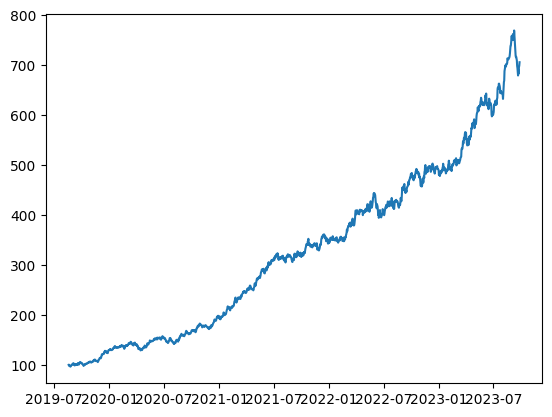

In [ ]:
plt.plot(S)
plt.show()

In [ ]:
import plotly.express as px

Print en graficos es .show

In [61]:
fig = px.line(S, title = 'Financial Asset')
fig.show()

In [18]:
# Without the Legend
fig.update_layout(showlegend = False)

# Center the title
fig.update_layout(title_text = 'Financial Asset Price',
                  title_font_size = 30,
                  title_x = 0.5)

# Modify the text in the axis
fig.update_xaxes(title = 'Dates', title_font_size = 25,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = 'USD', title_font_size = 25)

fig.show()

## 4.2 Basic Stadistics

In [29]:
# Very basic
print("Basic Stadistics")
print("Number of Obs:\t", S.size)
print("Minimum:\t", round(S.min(),2))
print("Mean:   \t", round(S.mean(),2))
print("Maximum:   \t", round(S.max(),2))



Basic Stadistics
Number of Obs:	 1500
Minimum:	 96.82
Mean:   	 327.63
Maximum:   	 769.21


## **Add stadisctics to the graph**

In [62]:
# Without the Legend
fig.update_layout(showlegend = False)

# Center the title
fig.update_layout(title_text = 'Financial Asset Price',
                  title_font_size = 30,
                  title_x = 0.5)

# Modify the text in the axis
fig.update_xaxes(title = 'Dates', title_font_size = 25,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = 'USD', title_font_size = 25)

## Add box
fig.add_annotation(x = "2019-10-01", y = 0.9*S.max(),
                  text = "<b> Basic Stadistics: </b>  <br>"
                          f"Obs: {S.size}, <br>"
                          f"Min: {round(S.min(),2)} <br>"
                          f"Mean: {round(S.mean(),2)} <br>"
                          f"Max:{round(S.max(),2)}",
                   align = "left",
                   showarrow=False,
                   yshift=10)


fig.show()